In [1]:
import pandas as pd
import numpy as np
import pickle
from pyproj import CRS
import geopandas as gpd
import shapely.geometry as sg
import os
import matplotlib.pyplot as plt

In [2]:
ahccd_stations = pd.read_excel('Homog_Temperature_Stations.xls', header=2)
ahccd_stations.drop(0, inplace=True)

In [3]:
ahccd_stations

No    StnId          Station name  Prov  From  Unnamed: 5    To  \
1      1  1100031          ABBOTSFORD_A    BC  1944        10.0  2019   
2      2  1100120           AGASSIZ_CDA    BC  1893         1.0  2018   
3      3  1100119           AGASSIZ_RCS    BC  1988        11.0  2019   
4      4  1036B06               ALBERNI    BC  1900         2.0  2019   
5      5  1160483             ARMSTRONG    BC  1913         3.0  1998   
..   ...      ...                   ...   ...   ...         ...   ...   
776  776  8403619           ST_LAWRENCE  NFLD  1989        11.0  2019   
777  777  8403820          STEPHENVILLE  NFLD  1895         6.0  2019   
778  778  8403851  TERRA_NOVA_NAT_PARK_  NFLD  1962         3.0  2019   
779  779  8504177           WABUSH_LAKE  NFLD  1960        11.0  2019   
780  780  8404343            WRECKHOUSE  NFLD  1981         6.0  2019   

     Unnamed: 7 %Miss Lat(deg) Long(deg) Elev(m) Joined RCS  
1          12.0   0.5       49    -122.3       5      y   n  
2           9.0   1.6     49.2    -121.7       1      n   n  
3          12.0   4.6     49.2    -121.7       1      n   y  
4          12.0   1.1     49.3    -124.9       7      y   n  
5          12.0  10.9     50.5    -119.2      50      y   n  
..          ...   ...      ...       ...     ...    ...  ..  
776        12.0  14.6     46.9     -55.3       4      y   y  
777        12.0   6.6     48.5     -58.5       5      y   y  
778        12.0   7.1     48.5     -53.9      10      y   y  
779        12.0   0.8     52.9     -66.8      55      y   y  
780        12.0   1.5     47.7     -59.3       3      y   y  

[780 rows x 14 columns]

In [4]:
ahccd_stations['StnId'] = ahccd_stations['StnId'].astype(str)
ahccd_stations['StnId'] = ahccd_stations['StnId'].str.strip()

In [5]:
precip_stations = pd.read_excel('StationSIS_3346.xls')
precip_stations

Climate ID          Station Name  Longitude (Decimal Degrees)  \
0       1018620      VICTORIA INT'L A                      -123.43   
1       1021260        CAMPBELL RIVER                      -125.30   
2       1021262   CAMPBELL RIVER BCFS                      -125.32   
3       1021320             CAPE LAZO                      -124.87   
4       1026270          PORT HARDY A                      -127.37   
...         ...                   ...                          ...   
3341    8402210            HINDS LAKE                       -57.13   
3342    8402972            POOLS COVE                       -55.43   
3343    8403850  TERRA NOVA COMMUNITY                       -54.22   
3344    8404210     WESTERN ARM BROOK                       -56.77   
3345    2100636       HERSCHEL ISLAND                      -138.91   

      Latitude (Decimal Degrees)  Elevation (metres)  Start year  End year  \
0                          48.65                19.2      194007    201307   
1                          50.02                79.2      193602    196905   
2                          50.07               128.0      196906    198210   
3                          49.70                38.1      193511    196208   
4                          50.68                21.6      194402    201306   
...                          ...                 ...         ...       ...   
3341                       49.05               299.9      197811    197909   
3342                       47.68                10.7      197811    200106   
3343                       48.50                93.0      195708    198907   
3344                       51.18                15.2      198106    201106   
3345                       69.57                 1.2      197407    197510   

      Number of years with data  Number of months with data  
0                            74                         877  
1                            34                         394  
2                            14                         160  
3                            28                         312  
4                            70                         833  
...                         ...                         ...  
3341                          2                           9  
3342                          3                          17  
3343                          5                          32  
3344                         29                         103  
3345                          2                           6  

[3346 rows x 9 columns]

In [6]:
precip_stations['Climate ID'] = precip_stations['Climate ID'].astype(str)
precip_stations['Climate ID'] = precip_stations['Climate ID'].str.strip()

## Find Common Stations

In [7]:
matched_ids = set(precip_stations['Climate ID'].to_list()) & set(ahccd_stations['StnId'].to_list())
len(matched_ids)

323

In [8]:
ahccd_stations[ahccd_stations['StnId'].isin(matched_ids)].sort_values('StnId')

No    StnId          Station name  Prov  From  Unnamed: 5    To  \
24    24  1012010  COWICHAN_BAY_CHERRY_    BC  1913        10.0  1984   
32    32  1012573                DUNCAN    BC  1926         1.0  2016   
100  100  1016940        SAANICHTON_CDA    BC  1914         3.0  2019   
102  102  1016995           SALTSPRING_    BC  1909        11.0  2019   
105  105  1017230        SHAWNIGAN_LAKE    BC  1913         4.0  2019   
..   ...      ...                   ...   ...   ...         ...   ...   
757  757  8401251               COLINET  NFLD  1938         8.0  1996   
762  762  8401550          EXPLOITS_DAM  NFLD  1956         6.0  2009   
770  770  8402958            PLUM_POINT  NFLD  1972         7.0  2019   
764  764  8501900                 GOOSE  NFLD  1941        12.0  2019   
766  766  8502400              HOPEDALE  NFLD  1942         1.0  2019   

     Unnamed: 7 %Miss Lat(deg) Long(deg) Elev(m) Joined RCS  
24          3.0   7.7     48.7    -123.5       0      n   n  
32          3.0   1.6     48.7    -123.7      10      y   n  
100         7.0   0.6     48.6    -123.4       6      n   n  
102        12.0     1     48.8    -123.5       4      y   n  
105        12.0   0.6     48.6    -123.6      15      n   n  
..          ...   ...      ...       ...     ...    ...  ..  
757         9.0   6.6     47.2     -53.5       5      y   n  
762         2.0   1.8     48.7     -56.6      15      n   n  
770         7.0   4.6       51     -56.8       0      n   y  
764        12.0   0.2     53.3     -60.4       4      n   y  
766        12.0  18.2     55.4     -60.2       1      n   y  

[323 rows x 14 columns]

In [9]:
def Save_Var(data, save_name):
    with open(str(save_name + ".data"), 'wb') as f:
        pickle.dump(data, f)
        
    try:
        with open(str(save_name + ".data"), 'rb') as f:
            new_data = pickle.load(f)
    except:
        print("Error: saving not successful")
    else:
        print(str(save_name + ".data" + " saved succesfully"))

def Load_Var(save_name):
    with open(save_name, 'rb') as f:
        data = pickle.load(f)
    return data

In [10]:
# Save_Var(matched_ids, 'matched_stations')

## Mapping Stations
- Stick with precipitation data has it has higher precision coordinates

In [11]:
precip_df = precip_stations[precip_stations['Climate ID'].isin(matched_ids)]

In [12]:
precip_df.rename(columns={'Climate ID': 'StnId'}, inplace=True)

C:\Users\quintoj\Anaconda3\envs\Default\lib\site-packages\pandas\core\frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
final_df = pd.merge(precip_df, ahccd_stations, on=['StnId'])

In [26]:
final_df.to_csv("full_metadata.csv", index=False)

In [14]:
ll_crs = CRS.from_proj4("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
aea_crs = CRS.from_proj4("+proj=aea +lat_1=61.67 +lat_2=68 +lon_0=-90") # AlbersEqualArea: equal-area, conic, good for Yukon, NWT

In [15]:
def get_gdf(df, y='Latitude', x='Longitude', crs=ll_crs):
    df['geometry'] = [sg.Point(x,y) for (x,y) in df[[x, y]].values] # Iterate over coordinates, construct Shapely Point
    gdf = gpd.GeoDataFrame(df) # Make Pandas DataFrame a GeoPandas GeoDataFrame
    gdf.crs = crs # Initialize coordinate reference system (crs)
    return gdf

In [16]:
station_gdf = get_gdf(final_df, x='Longitude (Decimal Degrees)', y='Latitude (Decimal Degrees)')
station_gdf

StnId            Station Name  Longitude (Decimal Degrees)  \
0    1026639  QUINSAM RIVER HATCHERY                      -125.30   
1    1090660             BARKERVILLE                      -121.51   
2    2400565         BREVOORT ISLAND                       -64.15   
3    2400660             CAPE HOOPER                       -66.82   
4    2401030             DEWAR LAKES                       -71.17   
..       ...                     ...                          ...   
318  4012130          DAVIDSON 30 NE                      -105.80   
319  4021600                 CODERRE                      -106.37   
320  6119511             WILDER LAKE                       -80.76   
321  7014160            L'ASSOMPTION                       -73.43   
322  3016965      WASTINA YOUNGSTOWN                      -111.12   

     Latitude (Decimal Degrees)  Elevation (metres)  Start year  End year  \
0                         50.02                45.7      197509    201602   
1                         53.07              1264.9      188802    201503   
2                         63.34               376.0      195911    200709   
3                         68.47               390.1      195708    200709   
4                         68.65               526.7      195802    200709   
..                          ...                 ...         ...       ...   
318                       51.42               640.1      200511    200803   
319                       50.13               684.9      194607    200801   
320                       44.16               390.0      199912    200901   
321                       45.81                21.0      193001    199408   
322                       51.67               762.0      197712    198109   

     Number of years with data  Number of months with data   No  ...  \
0                           42                         485   98  ...   
1                          127                        1476    8  ...   
2                           24                         253  183  ...   
3                           38                         420  187  ...   
4                           38                         437  194  ...   
..                         ...                         ...  ...  ...   
318                          4                          28  318  ...   
319                         63                         615  312  ...   
320                         11                         110  542  ...   
321                         65                         776  587  ...   
322                          5                          28  295  ...   

    Unnamed: 5    To Unnamed: 7  %Miss Lat(deg)  Long(deg) Elev(m) Joined RCS  \
0          7.0  2018       12.0    1.2       50     -125.3       4      y   n   
1          2.0  2015        3.0      5       53     -121.5     128      n   n   
2         11.0  2019       12.0   29.7     63.3      -64.1      37      n   n   
3          1.0  2018        7.0      7     68.4      -66.8      39      n   n   
4          2.0  2019       12.0    6.8     68.6      -71.1      52      n   y   
..         ...   ...        ...    ...      ...        ...     ...    ...  ..   
318        6.0  2008        3.0    7.8     51.4     -105.8      64      y   n   
319        4.0  2008        1.0   17.1     50.1     -106.3      68      n   n   
320       11.0  2009        1.0    5.7     44.1      -80.7      39      y   n   
321        1.0  2019       12.0    3.4     45.8      -73.4       2      y   n   
322        3.0  1981        9.0   11.2     51.6     -111.1      76      y   n   

                        geometry  
0    POINT (-125.30000 50.02000)  
1    POINT (-121.51000 53.07000)  
2     POINT (-64.15000 63.34000)  
3     POINT (-66.82000 68.47000)  
4     POINT (-71.17000 68.65000)  
..                           ...  
318  POINT (-105.80000 51.42000)  
319  POINT (-106.37000 50.13000)  
320   POINT (-80.76000 44.16000)  
321   POINT (-73.43000 45.81000)  
322  POINT (-111.12000 51.6700

In [17]:
PATH = 'Data'
# This is the Pandas DataFrame I am creating to (more easily?!) specify paths to shapefiles.  
path_description = pd.DataFrame(
data={'rivers':['Rivers','rivers_lake_centerlines','Physical'],
 'ocean':['Ocean','ocean','Physical'],
 'land':['Land','land','Physical'],
 'lakes':['Lakes','lakes','Physical'],
 'airports':['Airports','airports','Cultural'],
 'countries':['Countries','admin_0_countries','Cultural'],
 'provinces':['States_Provinces','admin_1_states_provinces','Cultural'],
 'time_zones':['Timezones','time_zones','Cultural'],
 'urban':['UrbanAreas','urban_areas','Cultural'],
},
index = ['SubFolder','File','Folder']).T
path_description

SubFolder                      File    Folder
rivers                Rivers   rivers_lake_centerlines  Physical
ocean                  Ocean                     ocean  Physical
land                    Land                      land  Physical
lakes                  Lakes                     lakes  Physical
airports            Airports                  airports  Cultural
countries          Countries         admin_0_countries  Cultural
provinces   States_Provinces  admin_1_states_provinces  Cultural
time_zones         Timezones                time_zones  Cultural
urban             UrbanAreas               urban_areas  Cultural

In [18]:
geographic_features = dict()
for idx, row in path_description.iterrows():
    shapefile_path = os.path.join(PATH, 'NaturalEarth', f"{row['Folder']}", f"{row['SubFolder']}", 
                             f"ne_10m_{row['File']}.shp")
    geographic_features[idx] = gpd.read_file(shapefile_path)

In [19]:
countries = geographic_features['countries'] # Get the GeoDataFrame for 'countries'
canada_table = countries.loc[countries['ADMIN']=='Canada'] # Select the country named 'Canada'
canada = canada_table['geometry'].values[0] # Pull the geometry of Canada

Text(0.5, 1.0, 'Precipitation stations in Canada')

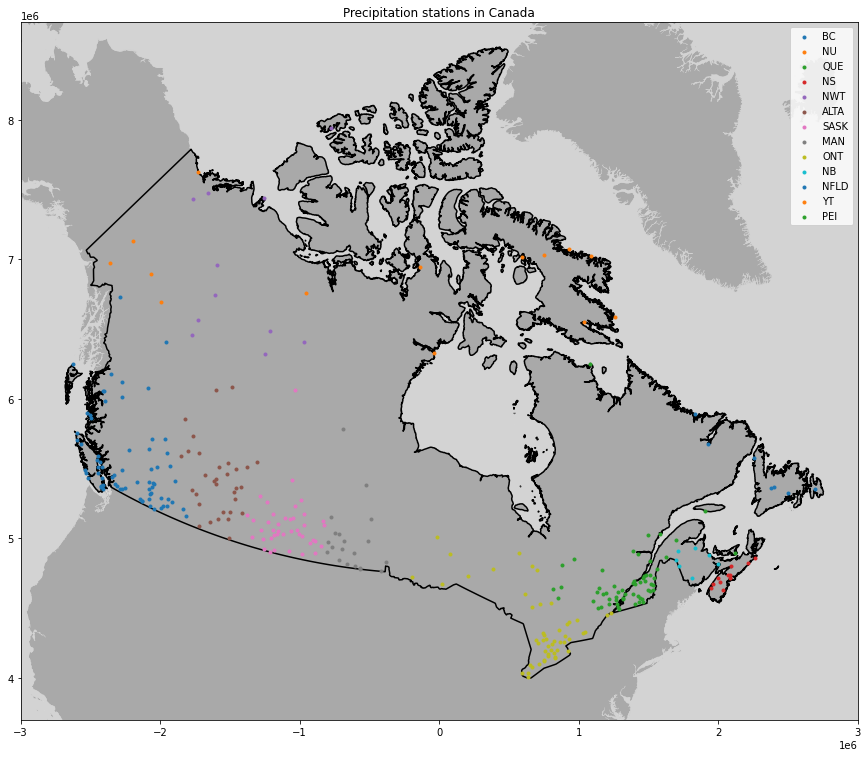

In [20]:
plt.figure(figsize=(15,15))
ax = plt.gca() # Get Current Axes
ax.axis([-3000000,3000000,3700000,8700000])
geographic_features['ocean'].to_crs(aea_crs).plot(ax=ax, color='lightgrey')
geographic_features['land'].to_crs(aea_crs).plot(ax=ax, color='darkgrey')
canada_table.boundary.to_crs(aea_crs).plot(ax=ax, color='k')
for province in station_gdf['Prov'].unique():
    station_gdf.loc[station_gdf['Prov']==province].to_crs(aea_crs).plot(ax=ax, marker='.', zorder=10, label=province)
plt.legend()
plt.title('Precipitation stations in Canada')

In [21]:
sdf = station_gdf[['Longitude (Decimal Degrees)', 'Latitude (Decimal Degrees)', 'Prov', 'StnId']]

In [22]:
sdf.rename(columns={'StnId':'Station'}, inplace=True)
sdf['Station'] = sdf['Station'].astype(str)

C:\Users\quintoj\Anaconda3\envs\Default\lib\site-packages\pandas\core\frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-22-22e885263fbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Station'] = sdf['Station'].astype(str)


In [23]:
sdf

Longitude (Decimal Degrees)  Latitude (Decimal Degrees)  Prov  Station
0                        -125.30                       50.02    BC  1026639
1                        -121.51                       53.07    BC  1090660
2                         -64.15                       63.34    NU  2400565
3                         -66.82                       68.47    NU  2400660
4                         -71.17                       68.65    NU  2401030
..                           ...                         ...   ...      ...
318                      -105.80                       51.42  SASK  4012130
319                      -106.37                       50.13  SASK  4021600
320                       -80.76                       44.16   ONT  6119511
321                       -73.43                       45.81   QUE  7014160
322                      -111.12                       51.67  ALTA  3016965

[323 rows x 4 columns]

In [24]:
ahccd_full = pd.read_csv("combined_ahccd.csv", index_col=['Station', 'Date'])

C:\Users\quintoj\Anaconda3\envs\Default\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
ahccd_full.reset_index(inplace=True)
ahccd_full['Station'] = ahccd_full['Station'].astype(str)
ahccd_full

Station        Date  cR(mm)  cS(mm)  QCdP=cR+cS(mm)  snow_frac  \
0        1012010  1913-10-03   1.050     0.0           1.050        0.0   
1        1012010  1913-10-04  16.338     0.0          16.338        0.0   
2        1012010  1913-10-07  29.234     0.0          29.234        0.0   
3        1012010  1913-10-09   2.610     0.0           2.610        0.0   
4        1012010  1913-10-10  15.298     0.0          15.298        0.0   
...          ...         ...     ...     ...             ...        ...   
2450647  8502400  1984-08-22   4.417     0.0           4.417        0.0   
2450648  8502400  1984-08-24   0.337     0.0           0.337        0.0   
2450649  8502400  1984-08-25   0.439     0.0           0.439        0.0   
2450650  8502400  1984-08-26   0.300     0.0           0.300        0.0   
2450651  8502400  1984-08-27   0.300     0.0           0.300        0.0   

         Mean_Temp  Max_Temp  Min_Temp  
0             11.0      15.2       6.7  
1              8.4      12.2       4.5  
2              6.3       5.3       7.3  
3              5.8      10.1       1.4  
4              6.7      10.6       2.7  
...            ...       ...       ...  
2450647       12.8      16.3       9.3  
2450648        9.4      12.4       6.3  
2450649       11.7      18.0       5.4  
2450650       18.7      24.2      13.1  
2450651       17.4      21.6      13.1  

[2450652 rows x 9 columns]

In [26]:
ahccd_updated = pd.merge(ahccd_full, sdf, on=['Station'])
ahccd_updated

Station        Date  cR(mm)  cS(mm)  QCdP=cR+cS(mm)  snow_frac  \
0        1012010  1913-10-03   1.050     0.0           1.050        0.0   
1        1012010  1913-10-04  16.338     0.0          16.338        0.0   
2        1012010  1913-10-07  29.234     0.0          29.234        0.0   
3        1012010  1913-10-09   2.610     0.0           2.610        0.0   
4        1012010  1913-10-10  15.298     0.0          15.298        0.0   
...          ...         ...     ...     ...             ...        ...   
2450647  8502400  1984-08-22   4.417     0.0           4.417        0.0   
2450648  8502400  1984-08-24   0.337     0.0           0.337        0.0   
2450649  8502400  1984-08-25   0.439     0.0           0.439        0.0   
2450650  8502400  1984-08-26   0.300     0.0           0.300        0.0   
2450651  8502400  1984-08-27   0.300     0.0           0.300        0.0   

         Mean_Temp  Max_Temp  Min_Temp  Longitude (Decimal Degrees)  \
0             11.0      15.2       6.7                      -123.56   
1              8.4      12.2       4.5                      -123.56   
2              6.3       5.3       7.3                      -123.56   
3              5.8      10.1       1.4                      -123.56   
4              6.7      10.6       2.7                      -123.56   
...            ...       ...       ...                          ...   
2450647       12.8      16.3       9.3                       -60.22   
2450648        9.4      12.4       6.3                       -60.22   
2450649       11.7      18.0       5.4                       -60.22   
2450650       18.7      24.2      13.1                       -60.22   
2450651       17.4      21.6      13.1                       -60.22   

         Latitude (Decimal Degrees)  Prov  
0                             48.71    BC  
1                             48.71    BC  
2                             48.71    BC  
3                             48.71    BC  
4                             48.71    BC  
...                             ...   ...  
2450647                       55.45  NFLD  
2450648                       55.45  NFLD  
2450649                       55.45  NFLD  
2450650                       55.45  NFLD  
2450651                       55.45  NFLD  

[2450652 rows x 12 columns]

In [27]:
np.unique(ahccd_updated['Station']).shape

(323,)

In [28]:
ahccd_updated.set_index(['Station','Longitude (Decimal Degrees)', 'Latitude (Decimal Degrees)', 'Prov', 'Date'])

cR(mm)  \
Station Longitude (Decimal Degrees) Latitude (Decimal Degrees) Prov Date                 
1012010 -123.56                     48.71                      BC   1913-10-03   1.050   
                                                                    1913-10-04  16.338   
                                                                    1913-10-07  29.234   
                                                                    1913-10-09   2.610   
                                                                    1913-10-10  15.298   
...                                                                                ...   
8502400 -60.22                      55.45                      NFLD 1984-08-22   4.417   
                                                                    1984-08-24   0.337   
                                                                    1984-08-25   0.439   
                                                                    1984-08-26   0.300   
                                                                    1984-08-27   0.300   

                                                                                cS(mm)  \
Station Longitude (Decimal Degrees) Latitude (Decimal Degrees) Prov Date                 
1012010 -123.56                     48.71                      BC   1913-10-03     0.0   
                                                                    1913-10-04     0.0   
                                                                    1913-10-07     0.0   
                                                                    1913-10-09     0.0   
                                                                    1913-10-10     0.0   
...                                                                                ...   
8502400 -60.22                      55.45                      NFLD 1984-08-22     0.0   
                                                                    1984-08-24     0.0   
                                                                    1984-08-25     0.0   
                                                                    1984-08-26     0.0   
                                                                    1984-08-27     0.0   

                                                                                QCdP=cR+cS(mm)  \
Station Longitude (Decimal Degrees) Latitude (Decimal Degrees) Prov Date                         
1012010 -123.56                     48.71                      BC   1913-10-03           1.050   
                                                                    1913-10-04          16.338   
                                                                    1913-10-07          29.234   
                                                                    1913-10-09           2.610   
                                                                    1913-10-10          15.298   
...                                                                                        ...   
8502400 -60.22                      55.45                      NFLD 1984-08-22           4.417   
                                                                    1984-08-24           0.337   
                                                                    1984-08-25           0.439   
                                                                    1984-08-26           0.300   
                                                                    1984-08-27           0.300   

                                                                                snow_frac  \
Station Longitude (Decimal Degrees) Latitude (Decimal Degrees) Prov Date                    
1012010 -123.56                     48.71                      BC   1913-10-03        0.0   
                                                                    1913-10-04        0.0   
                                                                    1913-10-07        0.0  

In [68]:
# ahccd_updated.to_csv("ahccd_combined_w_metadata.csv")

In [29]:
ahccd_updated[(ahccd_updated['Mean_Temp'] < -20) & (ahccd_updated['snow_frac'] < 0.2)]

Station        Date  cR(mm)  cS(mm)  QCdP=cR+cS(mm)  snow_frac  \
441316   1124112  1943-01-20   1.258     0.0           1.258        0.0   
597602   1168520  1924-12-15  11.550     0.0          11.550        0.0   
671804   1195250  2012-11-28   0.150     0.0           0.150        0.0   
687609   2100630  1979-12-09   0.150     0.0           0.150        0.0   
687610   2100630  1979-12-10   1.240     0.0           1.240        0.0   
...          ...         ...     ...     ...             ...        ...   
2225519  8100300  1973-02-01   0.225     0.0           0.225        0.0   
2239125  8102300  1979-01-20  22.573     0.0          22.573        0.0   
2248132  8103500  1986-01-25   1.150     0.0           1.150        0.0   
2372247  8205601  1993-01-31   0.150     0.0           0.150        0.0   
2443218  8502400  1953-01-31   1.258     0.0           1.258        0.0   

         Mean_Temp  Max_Temp  Min_Temp  Longitude (Decimal Degrees)  \
441316       -20.6     -17.8     -23.3                      -119.82   
597602       -21.2     -20.6     -21.7                      -119.78   
671804       -21.7     -18.4     -25.0                      -125.77   
687609       -28.5     -24.0     -33.0                      -137.58   
687610       -27.0     -16.0     -38.0                      -137.58   
...            ...       ...       ...                          ...   
2225519      -22.2     -10.0     -34.4                       -67.72   
2239125      -25.0     -13.0     -37.0                       -67.35   
2248132      -20.8     -11.0     -30.5                       -65.78   
2372247      -23.0     -15.0     -31.0                       -61.98   
2443218      -21.1     -17.2     -25.0                       -60.22   

         Latitude (Decimal Degrees)  Prov  
441316                        49.21    BC  
597602                        51.58    BC  
671804                        58.93    BC  
687609                        60.77    YT  
687610                        60.77    YT  
...                             ...   ...  
2225519                       46.71    NB  
2239125                       47.65    NB  
2248132                       47.40    NB  
2372247                       45.14    NS  
2443218                       55.45  NFLD  

[64 rows x 12 columns]